<a href="https://colab.research.google.com/github/ykjoy/mining/blob/main/python_vis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 시각화 (Data Visualization)   

Seaborn 패키지를 이용하여 다양한 형태의 차트를 만들 수 있다.   

http://seaborn.pydata.org/  
https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf  



- 산점도(Scatter Plot) : sns.scatterplot()
- 막대(Bar) 그래프 (평균, 빈도 막대): sns.barplot(), sns.countplot()
- 선(Line) 그래프 (시계열): sns.lineplot()
- 상자그림(Boxplot): sns.boxplot()

*본 실습은 쉽게 배우는 파이썬 데이터 분석 (김영우, 이지스퍼블리싱, 2022) 교재 참고

In [ ]:
%matplotlib inline
import pandas as pd
import seaborn as sns           # Seaborn 로딩하기

In [ ]:
#https://seaborn.pydata.org/tutorial/aesthetics.html

sns.set_style("whitegrid") # choose a style for seaborn figure

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# mpg(miles per gallon).csv 데이터 가져오기
mpg = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ITB/mpg.csv")
display(mpg.head()) 
print(mpg.info())  

# manufacturer:자동차 제조회사, model:모델, displ:배기량, year:제조년도, cyl:실린더 개수
# trans:변속기, drv:구동방식(f전륜구동/r후륜구동/4사륜구동), cty: 도시연비, hwy:고속도로연비 
# fl:연료종류 (cng/diesel/ethanol/premium/regual), category: 자동차종류 (compact/suv/2seater/midsize/minivan/midsize)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB
None


## 산점도

- 데이터를  x축과 y축에 점으로 표현한 그래프 
- 나이, 소득 등과 같이 연속값으로 된 두 변수의 관계 표현 

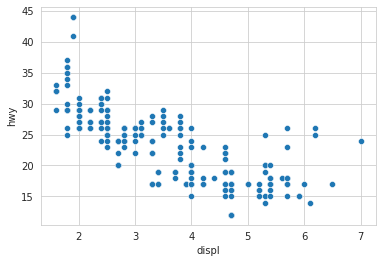

In [ ]:
# x축은 displ, y축은 hwy를 나타낸 산점도 만들기
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy')

[(4.0, 6.0)]

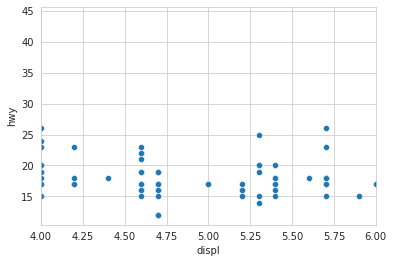

In [ ]:
# x축 범위 3~6으로 제한
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy').set(xlim = (4, 6))

[(10.0, 30.0), (3.0, 6.0)]

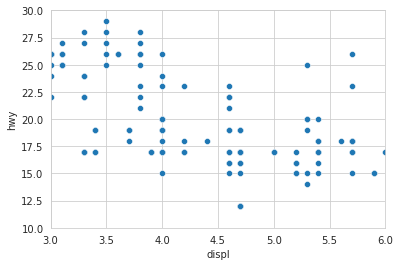

In [ ]:
# x축 범위 3~6, y축 범위 10~30으로 제한
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy') \
   .set(xlim = (3, 6), ylim = (10, 30))

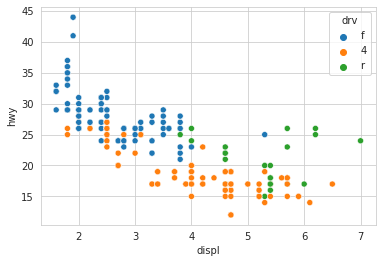

In [ ]:
# drv별로 표식 색깔 다르게 표현
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', hue = 'drv')

## 막대 그래프 
- 데이터의 크기를 막대의 길이로 표현
- 집단 간 차이 표현 

In [ ]:
#집단별 평균표 만들기
df_mpg = mpg.groupby('drv' , as_index = False).agg( meanhwy = ('hwy', 'mean'))
df_mpg

,drv,meanhwy
0,4,19.174757
1,f,28.160377
2,r,21.000000


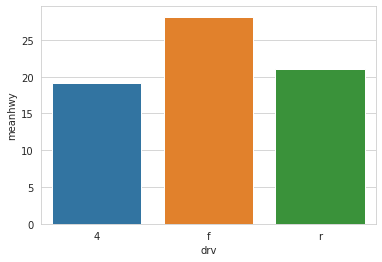

In [ ]:
sns.barplot(data = df_mpg, x = 'drv', y = 'meanhwy')

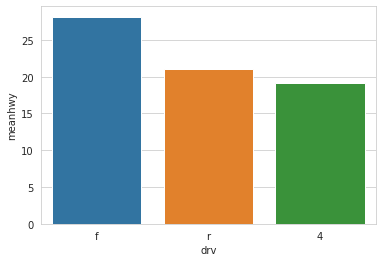

In [ ]:
# 데이터 프레임 정렬하기
df_mpg = df_mpg.sort_values('meanhwy', ascending = False)

# 막대 그래프 만들기
sns.barplot(data = df_mpg, x = 'drv', y = 'meanhwy')

In [ ]:
# 집단별 빈도표 만들기
df_mpg = mpg.groupby('drv', as_index = False).agg(n = ('drv', 'count'))

df_mpg

,drv,n
0,4,103
1,f,106
2,r,25


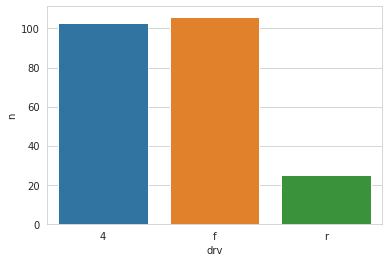

In [ ]:
# 막대 그래프 만들기
sns.barplot(data = df_mpg, x = 'drv', y = 'n')

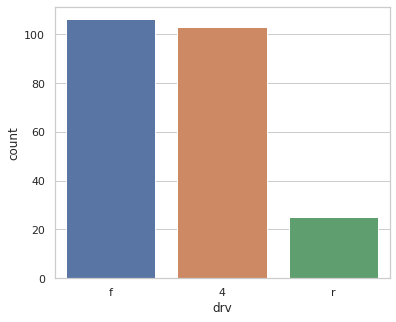

In [ ]:
# 빈도 막대 그래프 만들기
sns.countplot(data = mpg, x = 'drv')

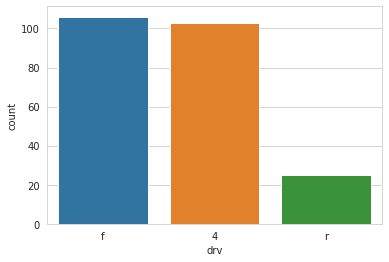

In [ ]:
# 4, f, r 순으로 막대 정렬
sns.countplot(data = mpg, x = 'drv', order = [ 'f', '4','r'])

In [ ]:
# drv의 값을 빈도가 높은 순으로 출력
mpg['drv'].value_counts().index

#mpg['drv'].value_counts().values  #빈도 출력

Index(['f', '4', 'r'], dtype='object')

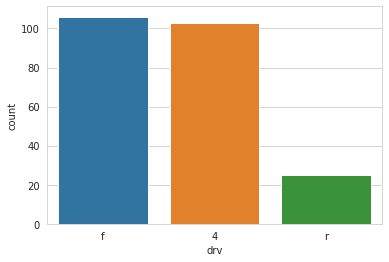

In [ ]:
# drv 빈도 높은 순으로 막대 정렬
sns.countplot(data = mpg, x = 'drv', order = mpg['drv'].value_counts().index)

## 선 그래프 
- 데이터를 선으로 표현한 그래프
- 환율, 주가 지수 등 시간에 따라 달라지는 경제지표(시계열) 데이터 표현시 자주 이용 

In [ ]:
# economics 데이터 불러오기
economics = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ITB/economics.csv")
display(economics.head())
economics.info()

# data: 데이터 수집 월, pce: personal consumption expenditures (in billions of dollars)
# pop: total population, in thousands (인구, 천단위), psavert: personal savings rate (개인 예금금리)
# unempmed: 실업 기간 중간값(median, 주단위), umemploy: 실업자 수 (천단위) 

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,506.7,198712.0,12.6,4.5,2944
1,1967-08-01,509.8,198911.0,12.6,4.7,2945
2,1967-09-01,515.6,199113.0,11.9,4.6,2958
3,1967-10-01,512.2,199311.0,12.9,4.9,3143
4,1967-11-01,517.4,199498.0,12.8,4.7,3066


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      574 non-null    object 
 1   pce       574 non-null    float64
 2   pop       574 non-null    float64
 3   psavert   574 non-null    float64
 4   uempmed   574 non-null    float64
 5   unemploy  574 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 27.0+ KB


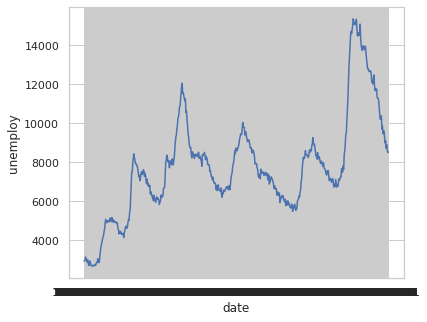

In [ ]:
sns.lineplot(data = economics, x = 'date', y = 'unemploy')

In [ ]:
# 날짜 시간 타입 변수 만들기
economics['date2'] = pd.to_datetime(economics['date'])

# 변수 타입 확인
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 31.5+ KB


In [ ]:
economics[['date', 'date2']]

,date,date2
0,1967-07-01,1967-07-01
1,1967-08-01,1967-08-01
2,1967-09-01,1967-09-01
3,1967-10-01,1967-10-01
4,1967-11-01,1967-11-01
...,...,...
569,2014-12-01,2014-12-01
570,2015-01-01,2015-01-01
571,2015-02-01,2015-02-01
572,2015-03-01,2015-03-01


In [ ]:
#economics['date2'].dt.year   # 연 추출

economics['date2'].dt.month  # 월 추출
#economics['date2'].dt.day    # 일 추출

0       7
1       8
2       9
3      10
4      11
       ..
569    12
570     1
571     2
572     3
573     4
Name: date2, Length: 574, dtype: int64

In [ ]:
# 연도 변수 추가
economics['year'] = economics['date2'].dt.year
economics

,date,pce,pop,psavert,uempmed,unemploy,date2,year
0,1967-07-01,506.7,198712.000,12.6,4.5,2944,1967-07-01,1967
1,1967-08-01,509.8,198911.000,12.6,4.7,2945,1967-08-01,1967
2,1967-09-01,515.6,199113.000,11.9,4.6,2958,1967-09-01,1967
3,1967-10-01,512.2,199311.000,12.9,4.9,3143,1967-10-01,1967
4,1967-11-01,517.4,199498.000,12.8,4.7,3066,1967-11-01,1967
...,...,...,...,...,...,...,...,...
569,2014-12-01,12062.0,319746.157,7.6,12.9,8717,2014-12-01,2014
570,2015-01-01,12046.0,319928.646,7.7,13.2,8903,2015-01-01,2015
571,2015-02-01,12082.4,320074.511,7.9,12.9,8610,2015-02-01,2015
572,2015-03-01,12158.3,320230.786,7.4,12.0,8504,2015-03-01,2015


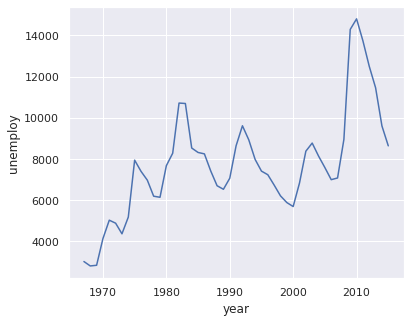

In [ ]:
# 그래프 사이즈 지정
sns.set(rc={'figure.figsize':(6, 5)}) 

# x축에 연도 표시
sns.lineplot(data = economics, x = 'year', y = 'unemploy', ci=None)

In [ ]:
#!pip install plotly   # interactive graph

import plotly.express as px 
px.line(data_frame=economics, x='date', y='unemploy', width=600, height=400) 

## 상자그림
- 데이터의 분포 또는 퍼져 있는 형태를 직사각형 상자 모양으로 표현 
- 상자 아래 가로선 (최솟값), 상자 밑면 (Q1), 중앙값, 상자윗면 (Q3), 상자 위 가로선 (최댓값)
- 이상치: Q1- (Q3-Q1)x1.5 미만 또는 Q3+(Q3-Q1)*1.5 초과 


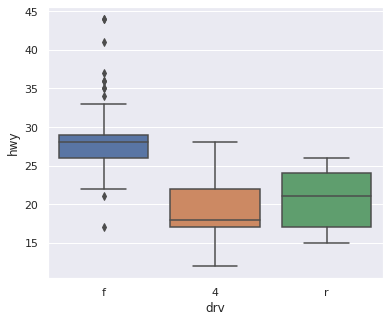

In [ ]:
sns.boxplot(data = mpg, x = 'drv', y = 'hwy')

# 전륜구동(f)은 25~29 사이의 좁은 범위에 모여있는 뽀족한 형태의 분포를 보임, 연비가 극단적으로 높거나 낮은 자동차들이 있음 
# 4륜구동(4)은 17~22 사이에 모여 있으며 중앙값이 상자 밑면에 가까운 것으로 낮은 값 쪽으로 치우친 형태의 분포를 보임
# 후륜구동(r)은 17~25 사이의 넓은 범위에 분포, 수염이 짧고 극단치가 없는 것을 보면 자동차 대부분이 사분위 범위에 해당     

# 데이터 전처리 (Data Preprocessing)   

데이터 분석 모델을 선정하는 것 만큼 어떤 데이터를 입력값으로 가지느냐에 따라 분석 결과는 크게 달라질 수 있으므로 다음과 같은 데이터 전처리 과정이 필요하다. (Garbage In, Garbage Out). 

- 결측치 (Missing Data) 처리
- 데이터 스케일링 조정
- 데이터 인코딩 (Encoding)
- 불균형 데이터셋 (Imbalanced Dataset) 처리 

*본 실습은 파이썬 머신러닝 완벽 가이드(권철민, 위키북스, 2020), 파이썬 라이브러리를 활용한 머신러닝 (A.Mueller & S.Guido, 박해선 역, 한빛미디어, 2019) 교재 참고

In [ ]:
%matplotlib inline
import pandas as pd

import seaborn as sns           # Seaborn 로딩하기
import matplotlib as mpl        # 기본 설정
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# csv 데이터 가져오기 (타겟 변수 MEDV: python_basic2.ipynb 의 PRICE와 같은 값임)
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ITB/BostonHousing_missing.csv")
df.rename(columns = {'MEDV':'PRICE'},inplace=True)
display(df.head())   

,CRIM,ZN,attributeINDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,NaN,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,NaN,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,NaN,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,NaN


In [ ]:
display(df.shape) # 행열
display(df.info()) # 데이터타입, null정보등 확인
display(df.isna().sum()) # 결측치 수
display(df.head(10))

(506, 14)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CRIM            502 non-null    float64
 1   ZN              506 non-null    float64
 2   attributeINDUS  506 non-null    float64
 3   CHAS            506 non-null    int64  
 4   NOX             504 non-null    float64
 5   RM              505 non-null    float64
 6   AGE             505 non-null    float64
 7   DIS             505 non-null    float64
 8   RAD             506 non-null    int64  
 9   TAX             505 non-null    float64
 10  PTRATIO         506 non-null    float64
 11  B               506 non-null    float64
 12  LSTAT           504 non-null    float64
 13  PRICE           505 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


None

CRIM              4
ZN                0
attributeINDUS    0
CHAS              0
NOX               2
RM                1
AGE               1
DIS               1
RAD               0
TAX               1
PTRATIO           0
B                 0
LSTAT             2
PRICE             1
dtype: int64

,CRIM,ZN,attributeINDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,NaN,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,NaN,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,NaN,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,NaN
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,NaN,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,NaN,15.2,386.71,17.10,18.9


## 결측치 처리
* 데이터를 살펴보고 결측치(Missing Data, Null, NaN)가 많지 않은 경우에는 평균값 등으로 간단히 대체하고, 대부분이 결측치라면 해당 변수를 분석에 사용하지 않는 것이 좋다. 
* 결측치가 어느 정도 이상일때 어떻게 결측치 처리를 해야 하는지에 대해서는 정해진 기준이 없기 때문에, 분석 목적과 데이터 특성 등을 상세히 검토하여 결정해야 한다. 


제거/보간/대체 예. 
- 결측데이터가 너무 많은 경우, 해당 데이터의 행(axis =0) 또는 열(axis =1) 제거
- 결측데이터가 일부인 경우, 가장 그럴듯한 값으로 대체
- 종속변수에 결측이 있으면 보간하지 않고 제거
- 결측치가 비어있지 않고 특수기호, 0  등으로 입력된 경우도 있으므로 반드시 원본 데이터를 확인하고 처리 


In [ ]:
print(df.isnull().sum())  #결측치 확인

CRIM              4
ZN                0
attributeINDUS    0
CHAS              0
NOX               2
RM                1
AGE               1
DIS               1
RAD               0
TAX               1
PTRATIO           0
B                 0
LSTAT             2
PRICE             1
dtype: int64


In [ ]:
# 1. 결측치 행 전체 삭제
df_drop_row = df.dropna(axis=0)   #열삭제의 경우 axis =1  (또는 특정 개수 이상의 결측치가 있는 경우만 삭제 thresh = 갯수)
print("결측행 모두 제거: ", df_drop_row.shape)    # 결측치 13행 모두 없어졌는지 확인

결측행 모두 제거:  (493, 14)


In [ ]:
# 2. 종속으로 사용할 집값(PRICE)의 결측치만 행제거 
df = df.dropna(subset = ['PRICE'], axis=0)   

print("\nPRICE 결측만 제거: ", df.shape)  # 결측치 1개만 제거되고, 나머지 변수들에 결측치 존재 확인
print(df.isna().sum()) 


PRICE 결측만 제거:  (505, 14)
CRIM              4
ZN                0
attributeINDUS    0
CHAS              0
NOX               2
RM                1
AGE               1
DIS               1
RAD               0
TAX               1
PTRATIO           0
B                 0
LSTAT             2
PRICE             0
dtype: int64


In [ ]:
#3. 보간법

from sklearn.impute import SimpleImputer
# strategy 옵션: mean (기본값), median, most_frequent, constant
# constant 예:  SimpleImputer(strategy='constant', fill_value=1)

imputer = SimpleImputer(strategy = "mean") # mean(평균), median(중앙값), most_frequent(최빈값)등 있음
df_impute = pd.DataFrame(imputer.fit_transform(df)) # imputer쓰면 numpy array로 변환되므로 df로 재변환했음. sklearn에서는 그냥 사용해도됨. 
print("\n평균으로 보간:", df_impute.shape)  
print(df_impute.isna().sum()) 


평균으로 보간: (505, 14)
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64


In [ ]:
#4. 대체

df2 = df.copy()
print(df2.isna().sum()) 

# fillna()를 이용하여 결측치 대체 
df2['CRIM'].fillna(0, inplace=True)
df2['LSTAT']= df2['LSTAT'].fillna(df2['LSTAT'].mean())
print(df2.isna().sum()) 

# 모든 결측치를 한번에 11로 변경
new_df = df2.fillna(11)
print(new_df.isna().sum())

CRIM              4
ZN                0
attributeINDUS    0
CHAS              0
NOX               2
RM                1
AGE               1
DIS               1
RAD               0
TAX               1
PTRATIO           0
B                 0
LSTAT             2
PRICE             0
dtype: int64
CRIM              0
ZN                0
attributeINDUS    0
CHAS              0
NOX               2
RM                1
AGE               1
DIS               1
RAD               0
TAX               1
PTRATIO           0
B                 0
LSTAT             0
PRICE             0
dtype: int64
CRIM              0
ZN                0
attributeINDUS    0
CHAS              0
NOX               0
RM                0
AGE               0
DIS               0
RAD               0
TAX               0
PTRATIO           0
B                 0
LSTAT             0
PRICE             0
dtype: int64


## 데이터 스케일 조정
* 단위가 다른 변수들의 값 범위를 일정한 수준으로 맞추어 주는 작업이다. 
* 다차원 값들을 비교 분석하기 쉽게 만들어 주며, 모델 학습과정에서 0으로 수렴하거나 무한으로 발산해 버릴 수 있는 것을 방지하고 (unverflow, overflow), 최적화 과정에서 안정성 및 수렴 속도를 향상시킨다. 
* 대표적인 스케일 조정 방법 
  * StandardScaler: 데이터 값을 평균 0, 분산 1로 변환 (정규 분포를 가정한 모델에서는 특히 중요 ) 
  * MinMaxScaler: 데이터 값을 0과 1 사이의 범위 값으로 변환 

  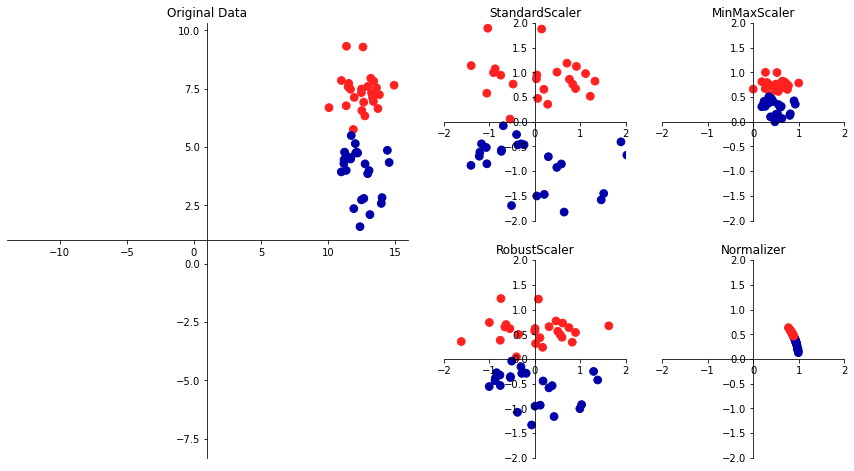
  

### StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

pd.options.display.float_format = '{:.3f}'.format  #지수표현 말고, 소수로 찍히게 설정

X = df_impute.iloc[:,0:-1]   #결측치 제거한 Dataframe의 독립변수
y = df_impute.iloc[:, -1]   #결측치 제거한 Dataframe의 종속변수

print("원본: \n", X.describe())

# 평균 0, 표준편차 1로 변환하는 standardscaler 적용
scaler_s = StandardScaler()

# sklearn써서 numpy배열로 바뀐것 dataframe변환
X_s = pd.DataFrame(scaler_s.fit_transform(X)) 

# fit( ) 과 transform( ) 따로 실행 가능   
# scaler.fit(X)
# X_s = scaler.transform(X)

print("\nStandardScaler: \n", X_s.describe())

원본: 
            0       1       2       3       4       5       6       7       8   \
count 505.000 505.000 505.000 505.000 505.000 505.000 505.000 505.000 505.000   
mean    3.647  11.386  11.155   0.069   0.555   6.282  68.576   3.791   9.562   
std     8.603  23.340   6.856   0.254   0.116   0.702  28.163   2.105   8.711   
min     0.006   0.000   0.460   0.000   0.385   3.561   2.900   1.130   1.000   
25%     0.082   0.000   5.190   0.000   0.449   5.885  45.000   2.100   4.000   
50%     0.268   0.000   9.690   0.000   0.538   6.208  77.300   3.199   5.000   
75%     3.678  12.500  18.100   0.000   0.624   6.619  94.100   5.118  24.000   
max    88.976 100.000  27.740   1.000   0.871   8.780 100.000  12.127  24.000   

           9       10      11      12  
count 505.000 505.000 505.000 505.000  
mean  408.800  18.455 356.594  12.645  
std   168.444   2.167  91.368   7.094  
min   187.000  12.600   0.320   1.730  
25%   279.000  17.400 375.330   7.120  
50%   330.000  19.100 39

### MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 최소 0, 최대 1로 변환하는 MinMaxScaler적용
scaler_m = MinMaxScaler()
X_m = pd.DataFrame(scaler_m.fit_transform(X))
print("\nMinMaxScaler: \n", X_m.describe())


MinMaxScaler: 
            0       1       2       3       4       5       6       7       8   \
count 505.000 505.000 505.000 505.000 505.000 505.000 505.000 505.000 505.000   
mean    0.041   0.114   0.392   0.069   0.350   0.521   0.676   0.242   0.372   
std     0.097   0.233   0.251   0.254   0.238   0.135   0.290   0.191   0.379   
min     0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   
25%     0.001   0.000   0.173   0.000   0.132   0.445   0.434   0.088   0.130   
50%     0.003   0.000   0.338   0.000   0.315   0.507   0.766   0.188   0.174   
75%     0.041   0.125   0.647   0.000   0.492   0.586   0.939   0.363   1.000   
max     1.000   1.000   1.000   1.000   1.000   1.000   1.000   1.000   1.000   

           9       10      11      12  
count 505.000 505.000 505.000 505.000  
mean    0.423   0.623   0.898   0.301  
std     0.321   0.231   0.230   0.196  
min     0.000   0.000   0.000   0.000  
25%     0.176   0.511   0.946   0.149  
50%     0.273

### Scaler 선택  
* 데이터 유형에 따라 적절한 Scaler 선택 
* StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, PowerTransformer, QuantileTransformer (uniform output), QuantileTransformer (Gaussian output), Normalizer 
* https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html?highlight=scaler

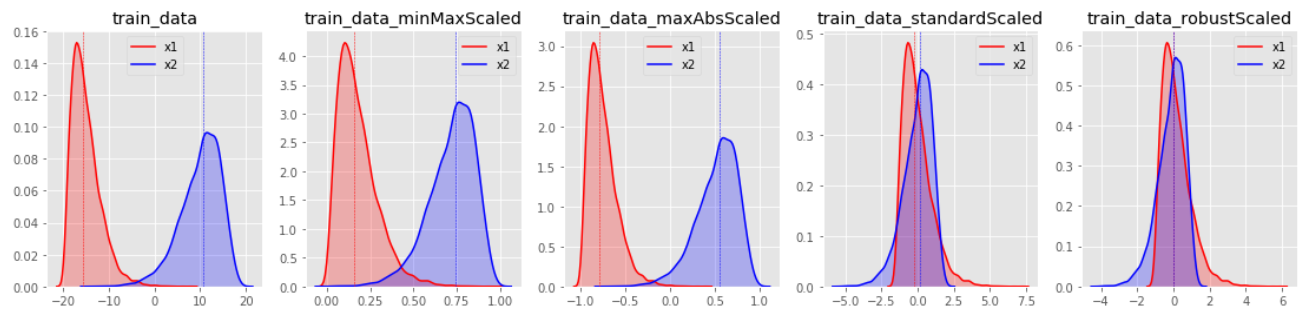

## 데이터 인코딩
scikit-learn의 모델들은 문자열 값을 입력 값으로 허용하지 않기 때문에 모든 문자열 값을 수치형으로 변환(Encoding)해야 한다. 대표적인 인코딩 방법은 다음과 같다. 

* **레이블 인코딩(Label Encoding)**: 
    * 카테고리를 코드형 수치 값으로 변환  
    * 순서가 있는 경우 (상/중/하, 중학교/고등학교/대학교 등 ), 원-핫 인코딩을 이용하기에는 카테고리가 너무 많은 경우 등  
* **원-핫 인코딩(One-Hot Encoding, 더미 변수화)**:      
   * 카테고리별로 새로운 더미 변수를 만들어 1/0으로 표시 
   * 순서가 없는 경우 (국가명 등), 카테고리 개수가 적절한 경우  등
 

### 레이블 인코딩(Label encoding)

In [ ]:
from sklearn.preprocessing import LabelEncoder

items=['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

# LabelEncoder를 객체로 생성한 후 , fit( ) 과 transform( ) 으로 label 인코딩 수행. 
encoder = LabelEncoder()
labels = encoder.fit_transform(items)
#encoder.fit(items)
#labels = encoder.transform(items)

print(items)
print('인코딩 클래스:',encoder.classes_)
print('인코딩 변환값:',labels)

['TV', '냉장고', '전자렌지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']
인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자렌지' '컴퓨터']
인코딩 변환값: [0 1 4 5 3 3 2 2]


### 원-핫 인코딩(One-Hot encoding)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# 먼저 숫자값으로 변환을 위해 LabelEncoder로 변환 
encoder = LabelEncoder()
labels = encoder.fit_transform(items)
# 2차원 데이터로 변환 
labels = labels.reshape(-1,1)

# 원-핫 인코딩 적용
oh_encoder = OneHotEncoder()
oh_labels = oh_encoder.fit_transform(labels)
print(items)
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

['TV', '냉장고', '전자렌지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']
원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


In [ ]:
drv = mpg['drv']
print(drv.head(10))

drv_dum = pd.get_dummies(drv)
drv_dum.head(10)

0    f
1    f
2    f
3    f
4    f
5    f
6    f
7    4
8    4
9    4
Name: drv, dtype: object


,4,f,r
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,1,0
6,0,1,0
7,1,0,0
8,1,0,0
9,1,0,0


## 불균형 데이터셋(Imbalanced datasets)
분류 문제에 있어 클래스 비중의 차이가 많이 나는 불균형 데이터의 경우 보정이 필요하다. 
* 한 클래스가 다른 클래스에 비해 훨씬 많을 경우 모델을 만들지 않아도 어느 정도 좋은 성능을 얻을 수 있다. 
* 모델 학습시에 클래스별로 가중치를 부여할 수 있다. (class_weight)


In [ ]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 데이터셋 설정 (Universal Bank에서 대출 캠페인에 반응한 사람)
# Universal Bank에서 대출 캠페인에 반응한 사람 (종속: Personal Loan, index 7)

df_bank = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ITB/UniversalBank.csv")
display(df_bank.info())
print(df_bank['PersonalLoan'].value_counts())

y = df_bank['PersonalLoan']
X = df_bank.drop('PersonalLoan', axis =1)
display(X.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                5000 non-null   int64  
 1   Experience         5000 non-null   int64  
 2   Income             5000 non-null   int64  
 3   Family             5000 non-null   int64  
 4   CCAvg              5000 non-null   float64
 5   Education          5000 non-null   int64  
 6   Mortgage           5000 non-null   int64  
 7   PersonalLoan       5000 non-null   int64  
 8   SecuritiesAccount  5000 non-null   int64  
 9   CDAccount          5000 non-null   int64  
 10  Online             5000 non-null   int64  
 11  CreditCard         5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


None

0    4520
1     480
Name: PersonalLoan, dtype: int64


Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'SecuritiesAccount', 'CDAccount', 'Online', 'CreditCard'],
      dtype='object')

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE # oversampling에서 많이 사용되는 알고리즘

Under= RandomUnderSampler(random_state=0)
X_under, y_under = Under.fit_resample(X, y)
print(y_under.value_counts(()))

Over = SMOTE(random_state=0)
X_over, y_over = Over.fit_resample(X, y)
print(y_over.value_counts(()))


0    480
1    480
Name: PersonalLoan, dtype: int64
0    4520
1    4520
Name: PersonalLoan, dtype: int64


### 모델에서 처리  
- 모델 생성시 class_weight = "balanced" 또는 {"클래스1":0.8, "클래스2":0.2} 등으로 지정 가능

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 가중치
weights = {0: 0.8, 1: 0.2}

# 가중치를 부여한 의사결정나무 만들기 (기본적으로 class_weight =None)
dt = DecisionTreeClassifier(class_weight=weights, random_state=0)
dt.fit(X, y)

DecisionTreeClassifier(class_weight={0: 0.8, 1: 0.2}, random_state=0)

In [ ]:
# 균형잡힌 클래스 가중치로 랜덤 포레스트 모델을 학습
dt2 = DecisionTreeClassifier(class_weight="balanced",random_state=0)
dt2.fit(X, y)

DecisionTreeClassifier(class_weight='balanced', random_state=0)